In [1]:
%%html

<script
    src="https://code.jquery.com/jquery-3.7.1.slim.min.js"
    integrity="sha256-kmHvs0B+OpCW5GVHUNjv9rOmY0IvSIRcf7zGUDTDQM8="
    crossorigin="anonymous"></script>

<script
    src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.7/require.min.js"
    integrity="sha512-J5ha2LF4Le+PBQnI5+xAVJDR+sZG9uSgroy4n/A6TLjNkvYQbqZA8WHZdaOvJ0HiKkBC9Frmvs10rFDSHKmveQ=="
    crossorigin="anonymous"
    referrerpolicy="no-referrer"></script>


TODO

In [2]:
import plotly
plotly.__version__

'5.24.0'

In [3]:
import plotly.io as pio
pio.renderers.default = "notebook_connected+plotly_mimetype"

In [5]:
import malariagen_data
ag3 = malariagen_data.Ag3(
    results_cache="results_cache",
    cohorts_analysis="20240717",
)
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release_master_us_central1
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10
Results cache           : /home/jupyter/alimanfoo.github.io/src/2024-09-05-kenya-coluzzii-njt/results_cache
Cohorts analysis        : 20240717
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 13.0.0
Client location         : Iowa, United States (Google Cloud us-central1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v13.0.0/Ag3.html

In [6]:
# hide progress for the blog post
ag3._show_progress = False

In [7]:
sample_sets = [
    # Samples from Kenya from Luna Kamau at KEMRI.
    "1274-VO-KE-KAMAU-VMF00246",
    # Ag1000G sample sets for comparison.
    "AG1000G-BF-A",
    "AG1000G-ML-A",
    "AG1000G-GH",
    "AG1000G-CI",
    "AG1000G-CF",
    "AG1000G-CM-B",
    "AG1000G-CM-C",
    "AG1000G-AO",
    # Samples from Fontaine et al. (2015).
    "fontaine-2015-rebuild",
]

In [8]:
sample_query = "taxon == 'coluzzii'"

In [9]:
df_count = ag3.count_samples(
    sample_sets=sample_sets,
    sample_query=sample_query,
    index=["sample_set", "country", "admin1_name"],
)
df_count

taxon                                                                    coluzzii
sample_set                country                  admin1_name                   
1274-VO-KE-KAMAU-VMF00246 Kenya                    Turkana                     26
AG1000G-AO                Angola                   Luanda                      81
AG1000G-BF-A              Burkina Faso             Hauts-Bassins               82
AG1000G-CF                Central African Republic Bangui                      18
AG1000G-CI                Cote d'Ivoire            Lagunes                     80
AG1000G-CM-B              Cameroon                 Far North                    2
                                                   North                        5
AG1000G-CM-C              Cameroon                 Adamaoua                     2
                                                   Centre                      12
                                                   Littoral                     2
                                                   North                        1
                                                   South                        2
AG1000G-GH                Ghana                    Central Region              25
                                                   Eastern Region               1
                                                   Greater Accra Region        14
                                                   Western Region              24
AG1000G-ML-A              Mali                     Koulikouro                  27
fontaine-2015-rebuild     Burkina Faso             Hauts-Bassins                3
                          Cameroon                 Centre                       4
                                                   South                        4

In [10]:
df_count["coluzzii"].sum()

np.int64(415)

In [11]:
data_params = dict(
    region="3RL",
    n_snps=100_000,
    sample_sets=sample_sets,
    sample_query=sample_query,
    site_mask="gamb_colu",
    max_missing_an=0,
    min_minor_ac=10,
)

In [12]:
category_orders = {
    "country": [
        "Kenya",
        "Burkina Faso",
        "Mali",
        "Cote d'Ivoire",
        "Ghana",
        "Central African Republic",
        "Cameroon", 
        "Angola",
    ],
}

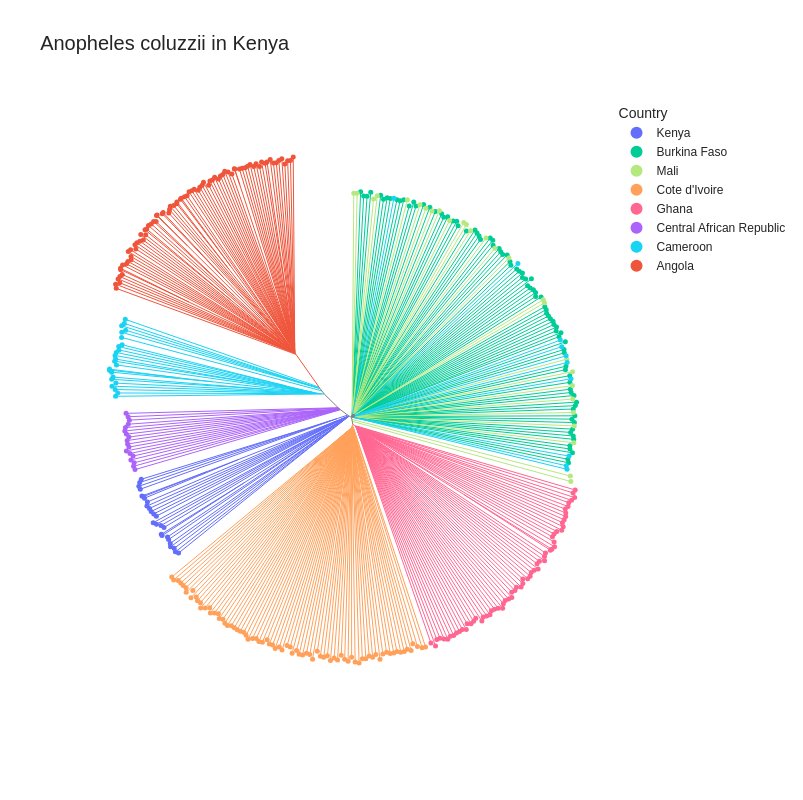

In [13]:
fig = ag3.plot_njt(
    metric="cityblock",
    title="Anopheles coluzzii in Kenya",
    width=800,
    height=800,
    show=False,
    color="country",
    marker_size=5,
    line_width=1,
    category_orders=category_orders,
    **data_params,
)
fig.update_layout(
    legend=dict(
        title="Country",
    ),
    title_font=dict(
        size=20,
    ),
)
fig